## Importing necessary libraries and dataset description

In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

![Variable Description](EDA_Air_Bnb_Bookings_Analysis_73e51f569a.png)

## Dataset loading and cleaning

In [3]:
## Loading Dataset
df = pd.read_csv(filepath_or_buffer="Airbnb NYC 2019.csv", sep=',')

#### First five rows

In [4]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
## Info Method 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

|Data Type|float64|int64|object|
|---------|-------|-----|------|
|Total    |   3   |   7 | 6    |

#### Checking for Null Values

In [6]:
## Checking for Null values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
## Checking null value in percenaga only for the column with high null values
print(f"\'last_review\' null values in percentage {round((df['last_review'].isna().sum()/df.shape[0])*100, 1)}%")
print(f"\'reviews_per_month\' null values in percentage {round((df['reviews_per_month'].isna().sum()/df.shape[0])*100, 1)}%")

'last_review' null values in percentage 20.6%
'reviews_per_month' null values in percentage 20.6%


In [8]:
## Checking for central tedency
print("reviews_per_month")
print('-----------------')
print(f"- Mean {np.mean(df['reviews_per_month'])}\n- Median {np.median(sorted(df['reviews_per_month']))}")

reviews_per_month
-----------------
- Mean 1.3732214298586618
- Median nan


Both the column have null value around 20%.
|Column|Null Percentage|Data Type|Max Value|Min Value|Median Value|Mean Value|Operation|
|------|---------------|---------|---------|---------|---------|---------|-----|
|last_review|20.6|object|-|-|-|-|Drop|
|reviews_per_month|20.6|float64|58.5|0.01|Nan|1.37|Mean Imputation|

#### Imputing Null Values and Droping Rows and Columns with Null Values

In [9]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
df['reviews_per_month'] = df['reviews_per_month'].astype(int)
df.drop(['last_review'], axis=1, inplace=True)

In case of `name` and `host_name` don't establish any relationship nither apply any **Imputation techniques**. So will drop all the Rows with null values.

In [10]:
df.dropna(how='any', axis=0, inplace=True)

#### Checking for Duplicate Rows

In [11]:
## Checking for duplicates rows
df.duplicated().any()

np.False_

## Dataset overview after data cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  reviews_per_month               48858

In [13]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0                  0                               6               365  
1                  0                               2               355  
2                  1                               1               365  
3                  4                               1               194  
4                  0                               1                 0

## Descriptive Statistics

In [14]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.885800e+04  4.885800e+04  48858.000000  48858.000000  48858.000000   
mean   1.902335e+07  6.763169e+07     40.728941    -73.952170    152.740309   
std    1.098289e+07  7.862389e+07      0.054528      0.046159    240.232386   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.475980e+06  7.818669e+06     40.690090    -73.983070     69.000000   
50%    1.969114e+07  3.079133e+07     40.723070    -73.955680    106.000000   
75%    2.915765e+07  1.074344e+08     40.763107    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48858.000000       48858.000000       48858.000000   
mean         7.012444          23.273098           1.011810   
std         20.019757          44.549898           1.445818   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.000000   
50%          3.000000           5.000000           1.000000   
75%          5.000000          24.000000           1.000000   
max       1250.000000         629.000000          58.000000   

       calculated_host_listings_count  availability_365  
count                    48858.000000      48858.000000  
mean                         7.148369        112.801425  
std                         32.964600        131.610962  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [15]:
df.describe(exclude=['int64', 'float64'])

name host_name neighbourhood_group neighbourhood  \
count            48858     48858               48858         48858   
unique           47884     11450                   5           221   
top     Hillside Hotel   Michael           Manhattan  Williamsburg   
freq                18       417               21643          3917   

              room_type  
count             48858  
unique                3  
top     Entire home/apt  
freq              25393

## Data Distribution

#### Univariate Analysis

In [16]:
def plot_univariate(data, column, plot_type='histogram', xlabel=None, ylabel=None, bins='auto'):
    """
    Parameters:
    - data: DataFrame, the dataset containing the column to be plotted
    - column: str, the column name to be plotted
    - plot_type: str, type of plot ('histogram', 'boxplot', 'density')
    - title: str, title of the plot
    - xlabel: str, label for the x-axis
    - ylabel: str, label for the y-axis
    - bins: int, number of bins for histogram (if applicable)
    - color: str, color for the plot

    Returns:
    - Matplotlib axis object
    """

    title = " ".join(column.split('_')).title()

    # Set color palette
    palette = sns.color_palette("flare")
    color = palette[-1]  # Choose the first color from the palette

    plt.figure(figsize=(10, 6))
    
    if plot_type == 'histogram':
        sns.histplot(data[column], bins=bins, color=color)
        ylabel = ylabel or 'Frequency'
    
    elif plot_type == 'boxplot':
        sns.boxplot(x=data[column], color=color)
        ylabel = ylabel or column
    
    elif plot_type == 'density':
        sns.kdeplot(data[column], color=color, fill=True)
        ylabel = ylabel or 'Density'
    
    else:
        raise ValueError("plot_type must be 'histogram', 'boxplot', or 'density'")
    
    plt.title(f'{plot_type.title()} Plot of {title}')
    plt.xlabel(xlabel or title)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

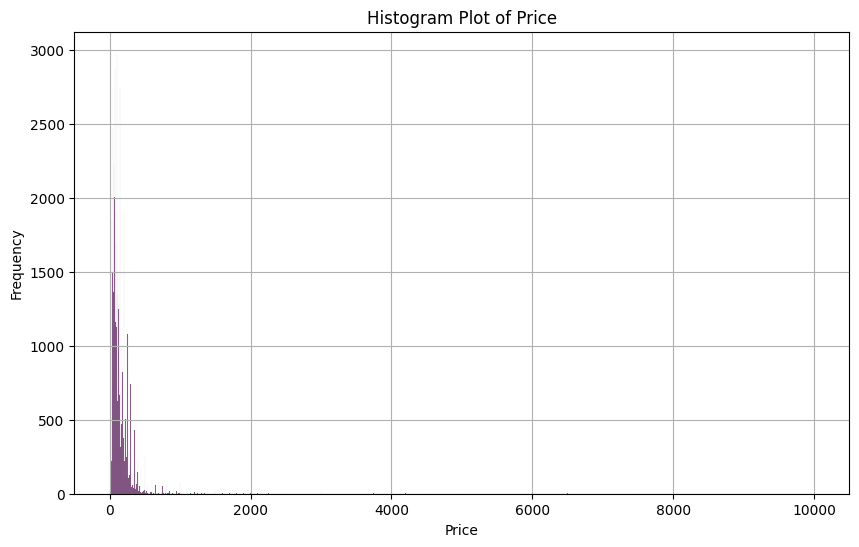

In [17]:
plot_univariate(df, 'price')

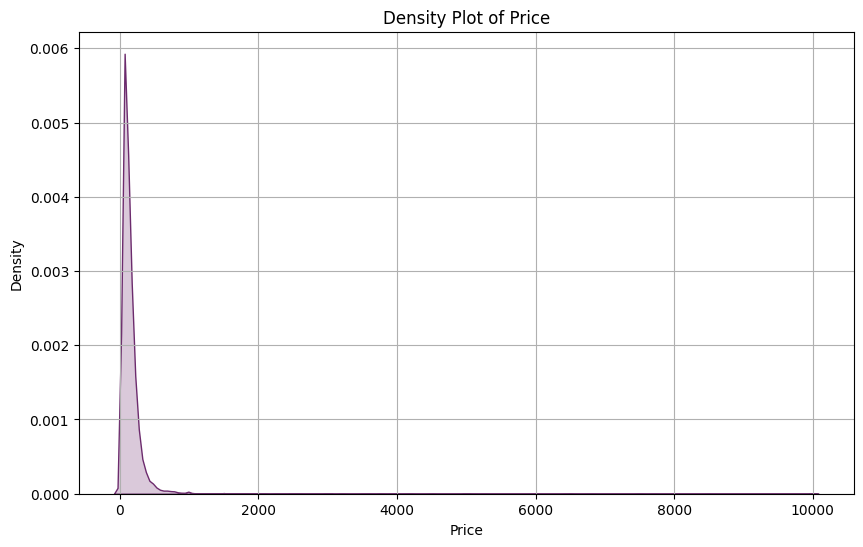

In [18]:
plot_univariate(df, 'price', plot_type='density')

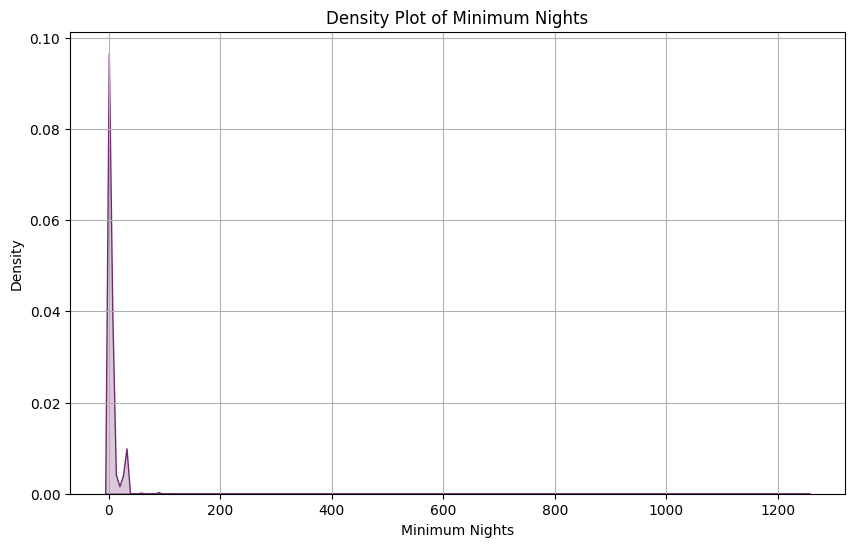

In [19]:
plot_univariate(df, 'minimum_nights', plot_type='density')

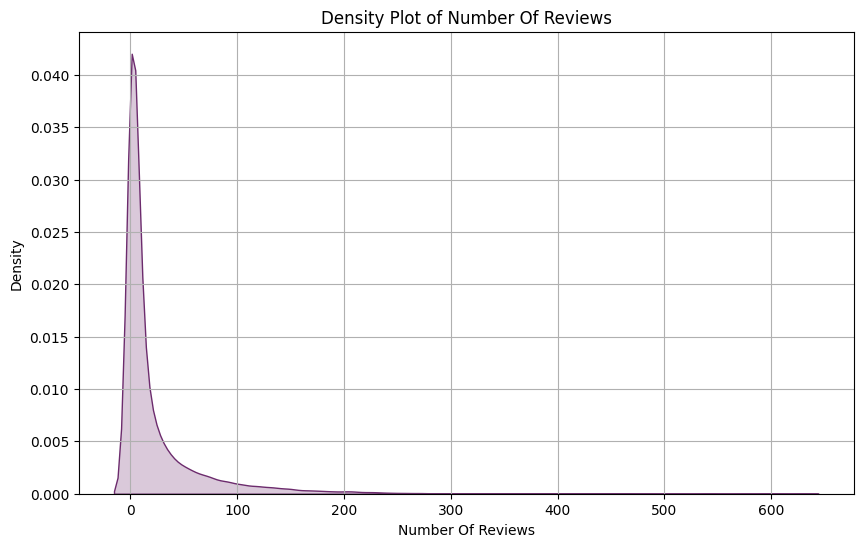

In [20]:
plot_univariate(df, 'number_of_reviews', plot_type='density')

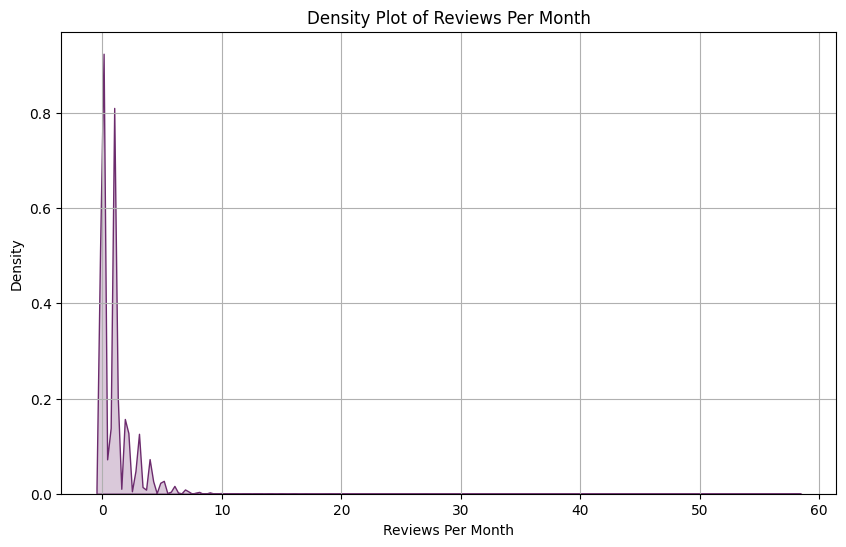

In [21]:
plot_univariate(df, 'reviews_per_month', plot_type='density')

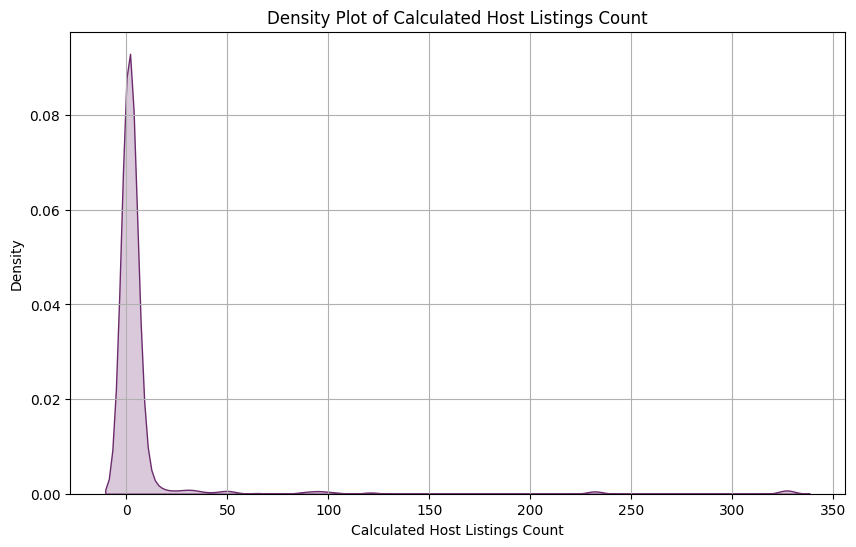

In [22]:
plot_univariate(df, 'calculated_host_listings_count', plot_type='density')

In [23]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

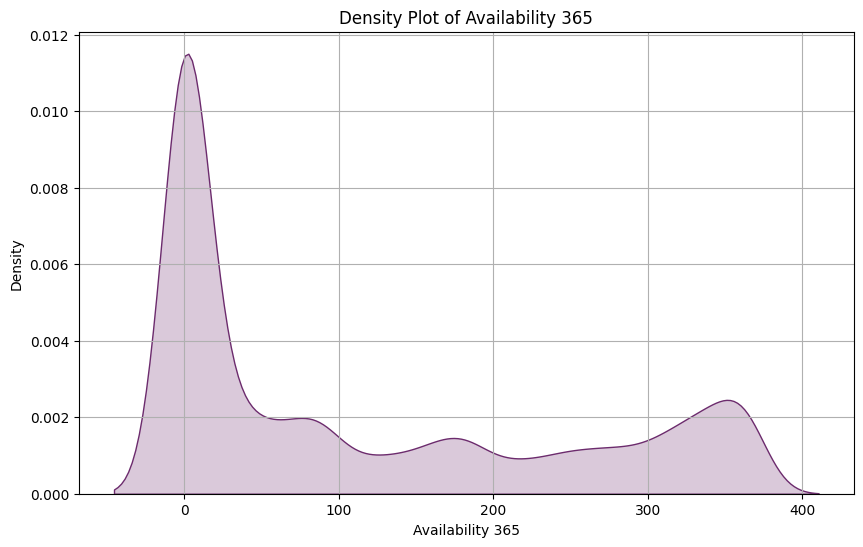

In [24]:
plot_univariate(df, 'availability_365', plot_type='density')

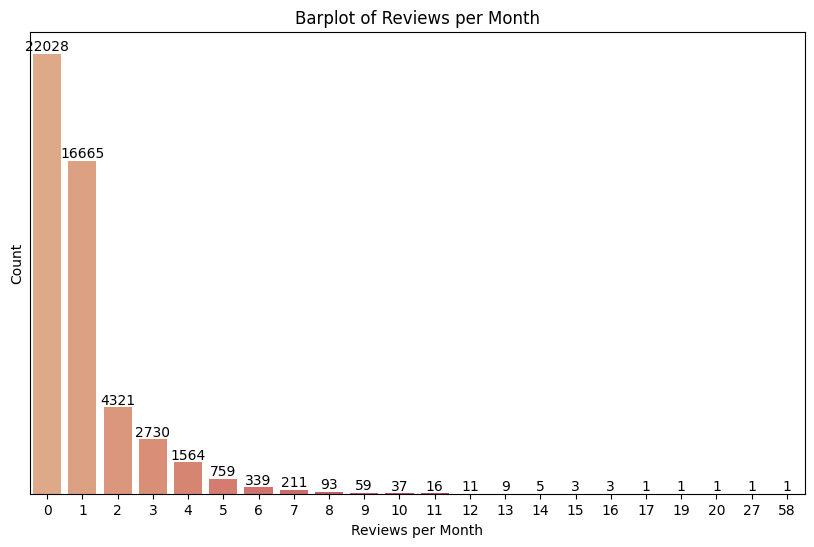

In [25]:
plt.figure(figsize=(10, 6))

# Count the values of 'reviews_per_month'
reviews_per_month_counts = df['reviews_per_month'].value_counts()

# Create a bar plot
sns.barplot(x=reviews_per_month_counts.index, y=reviews_per_month_counts.values, palette='flare')

# Add annotations
for index, value in enumerate(reviews_per_month_counts.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Set title and labels
plt.title('Barplot of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Count')
plt.yticks([])
plt.grid(False)

# Show plot
plt.show()

#### Bivariate analysis

In [26]:
def plot_bivariate(data, x, y, plot_type='scatter', title=None, xlabel=None, ylabel=None, hue=None, **kwargs):
    """
    Creates bivariate plots using Seaborn and Matplotlib.

    Parameters:
    - data: DataFrame, the dataset containing the columns to be plotted
    - x: str, the column name for the x-axis
    - y: str, the column name for the y-axis
    - plot_type: str, type of plot ('scatter', 'boxplot', 'jointplot')
    - xlabel: str, label for the x-axis
    - ylabel: str, label for the y-axis
    - hue: str, column name for color encoding (optional)

    Returns:
    - Matplotlib axis object
    """

    plt.figure(figsize=(10, 6))
    
    if plot_type == 'scatter':
        sns.scatterplot(data=data, x=x, y=y, hue=hue, palette='flare', **kwargs)
    
    elif plot_type == 'regplot':
        sns.regplot(data=data, x=x, y=y, **kwargs)
    
    elif plot_type == 'barplot':
        sns.barplot(data=data, x=x, hue=hue, palette="flare", gap=0.2)
    
    else:
        raise ValueError("plot_type must be 'scatter', 'regplot', or 'barplot'")
    
    X = " ".join(x.split('_')).title()
    if not plot_type=='barplot':
        Y = " ".join(y.split('_')).title()
        plt.ylabel(ylabel or Y)
        plt.title(f'{plot_type.capitalize()} plot of {X} and {Y}')
    plt.title(f'{plot_type.capitalize()} plot of {X}')
    plt.xlabel(xlabel or X)
    plt.grid(True)
    plt.show()

In [27]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                      0                               6               365  
1                      0                               2               355  
2                      1                               1               365  
3                      4                               1               194  
4                      0                               1                 0  
...                  ...                             ...               ...  
48890                  1                               2                 9  
48891                  1                               2                36  
48892                  1                               1                27  
48893                  1                               6                 2  
48894                  1                               1                23  

[48858 rows x 15 columns]

<BarContainer object of 10 artists>

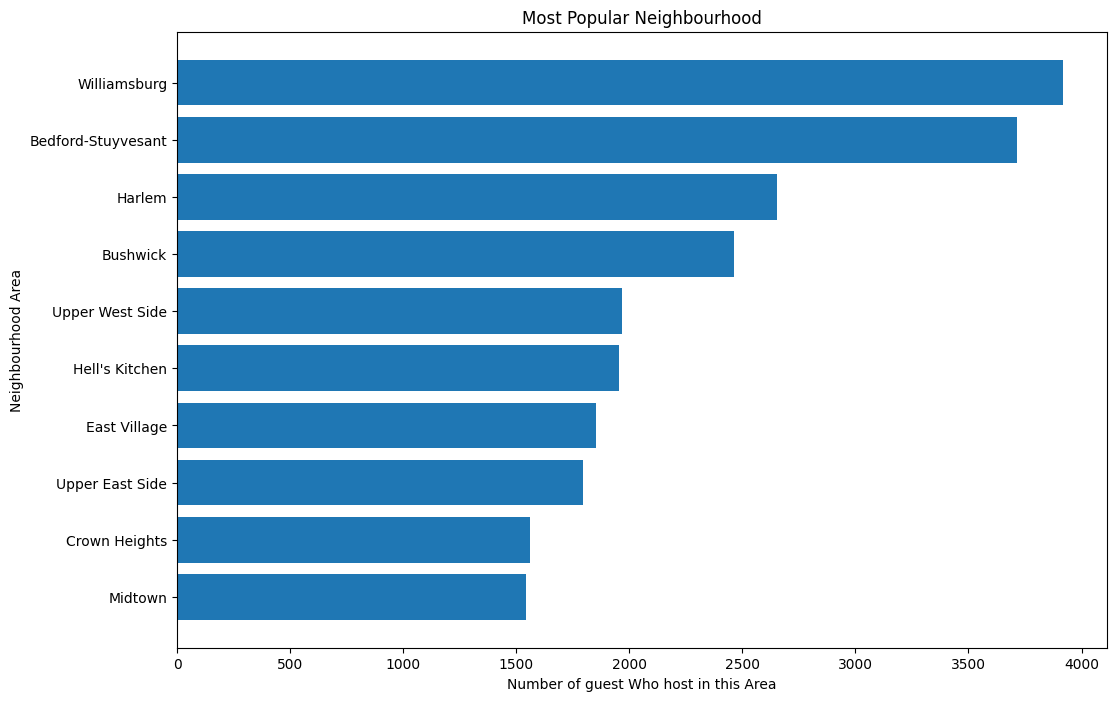

In [28]:
plt.figure(figsize=(12, 8))
popular = df.neighbourhood.value_counts()[:10]
x = list(popular.index)
y = list(popular.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood", )
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

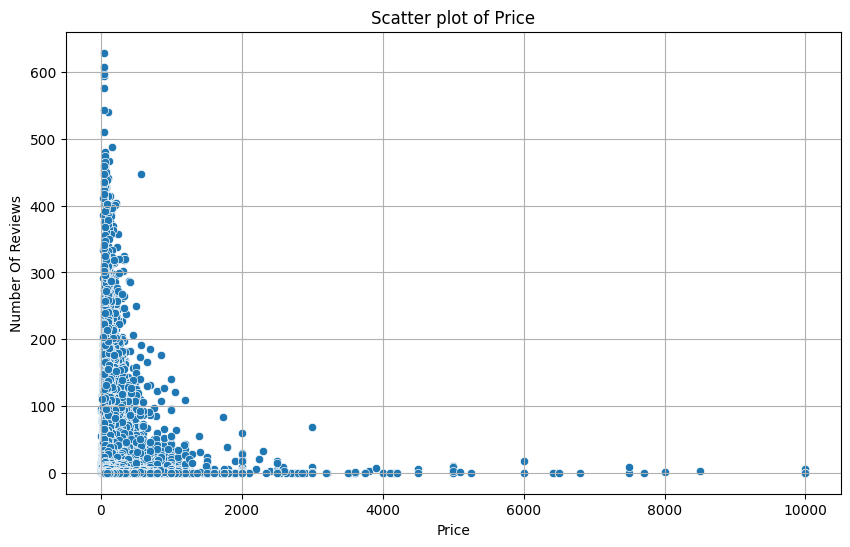

In [29]:
plot_bivariate(df, x = 'price', y = 'number_of_reviews')

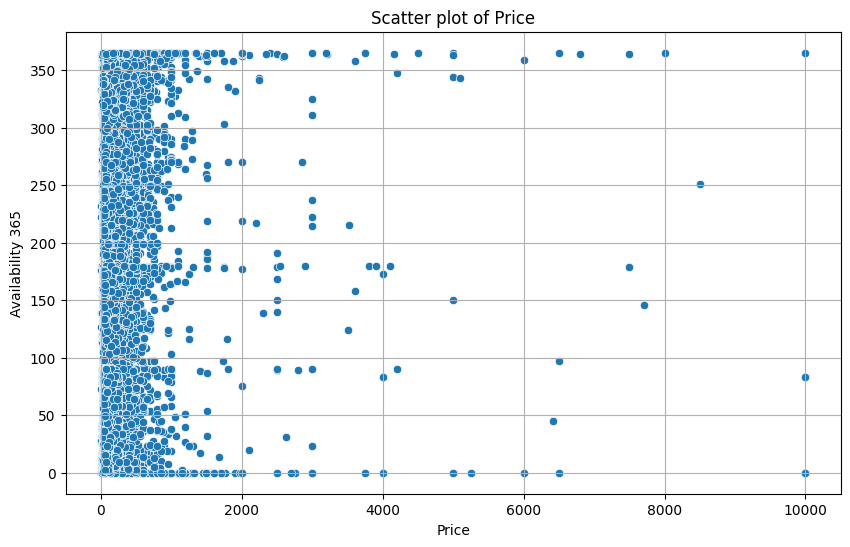

In [30]:
plot_bivariate(df, x = 'price', y = 'availability_365')

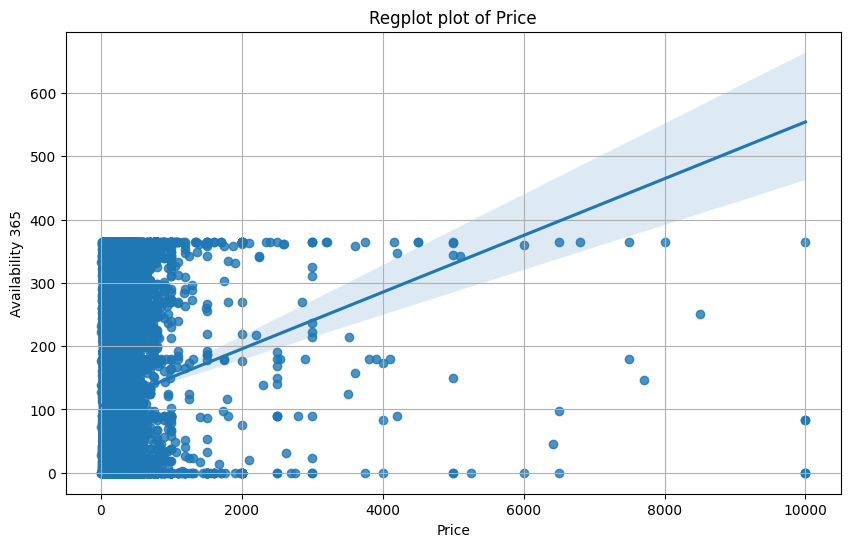

In [31]:
plot_bivariate(df, x = 'price', y = 'availability_365', plot_type='regplot')

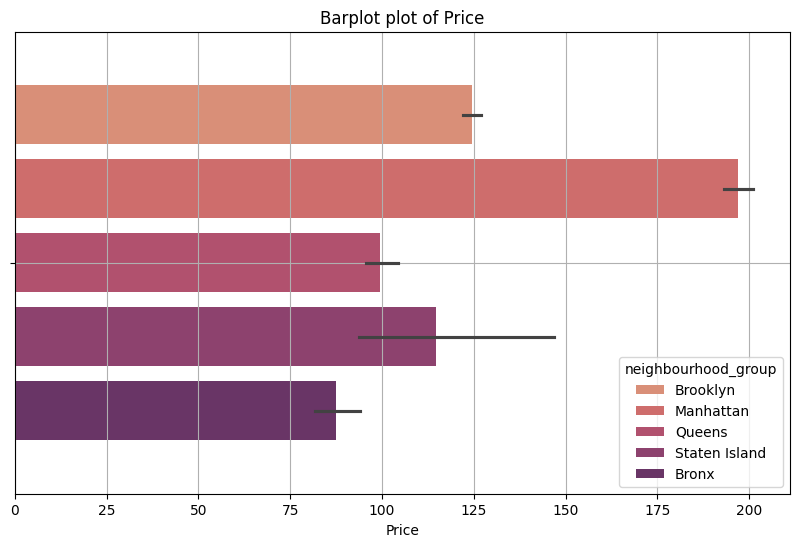

In [32]:
plot_bivariate(df, x = 'price', hue='neighbourhood_group', y=None, plot_type='barplot')

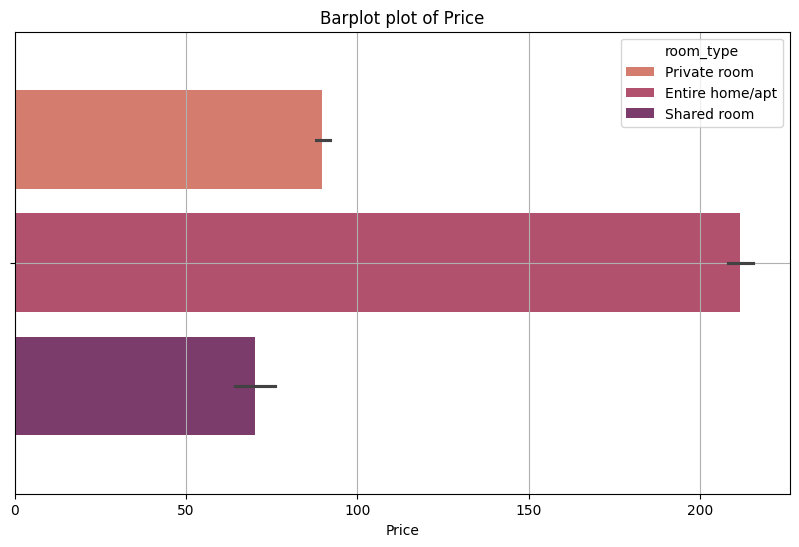

In [33]:
plot_bivariate(df, x = 'price', hue='room_type', y=None, plot_type='barplot')

#### Multivariate analysis

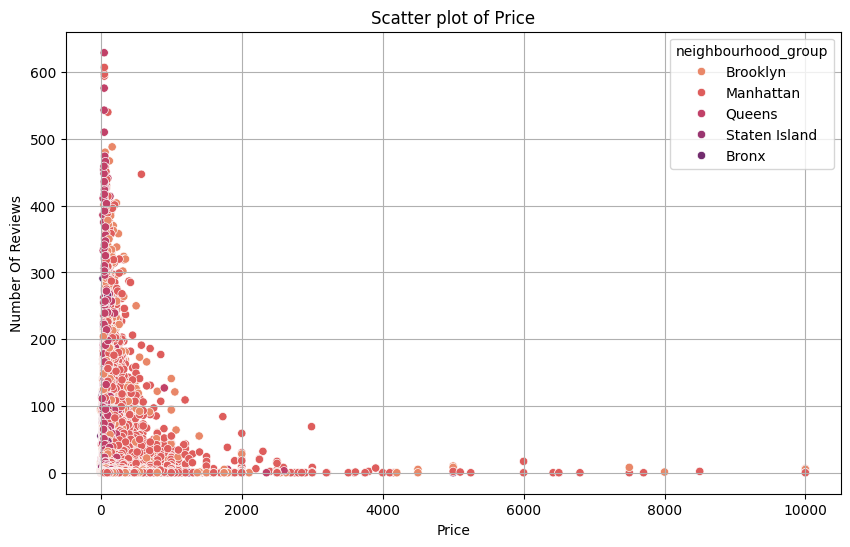

In [34]:
plot_bivariate(df, x = 'price', y = 'number_of_reviews', hue='neighbourhood_group')

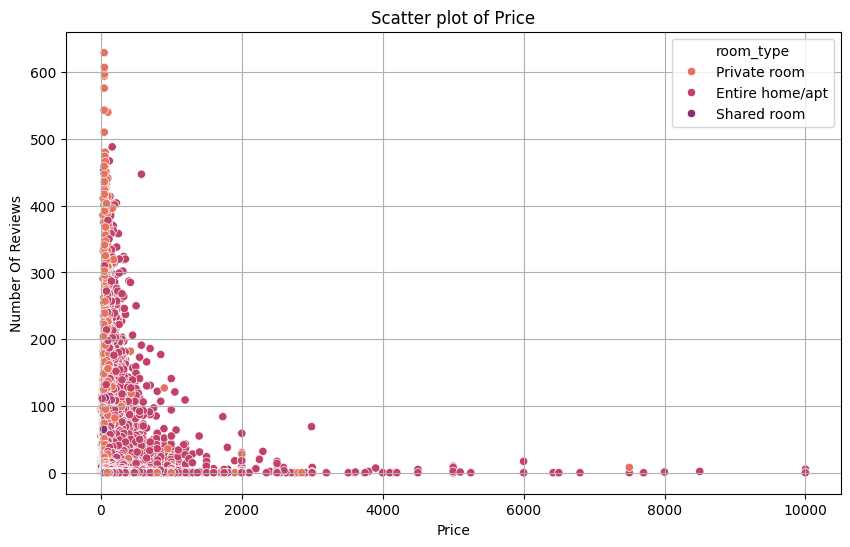

In [35]:
plot_bivariate(df, x = 'price', y = 'number_of_reviews', hue='room_type')

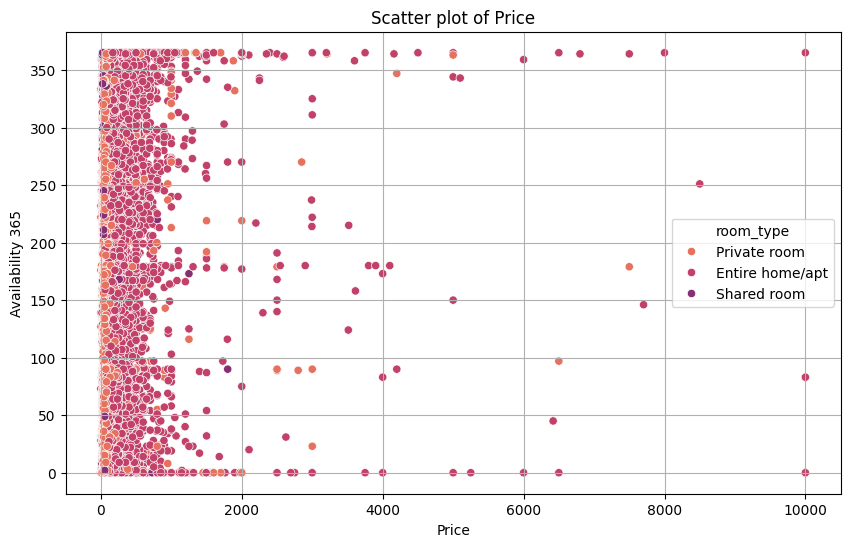

In [36]:
plot_bivariate(df, x = 'price', y = 'availability_365', hue = 'room_type')

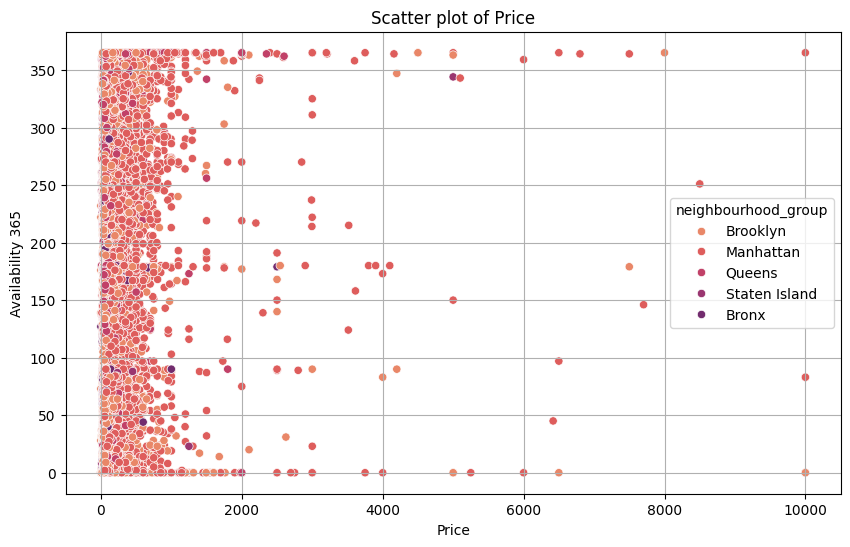

In [37]:
plot_bivariate(df, x = 'price', y = 'availability_365', hue = 'neighbourhood_group')

#### Seperating Numerical and Categorical Columns

In [38]:
numerical_col = df.select_dtypes(exclude='object')
categorical_col = df.select_dtypes(include='object')

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

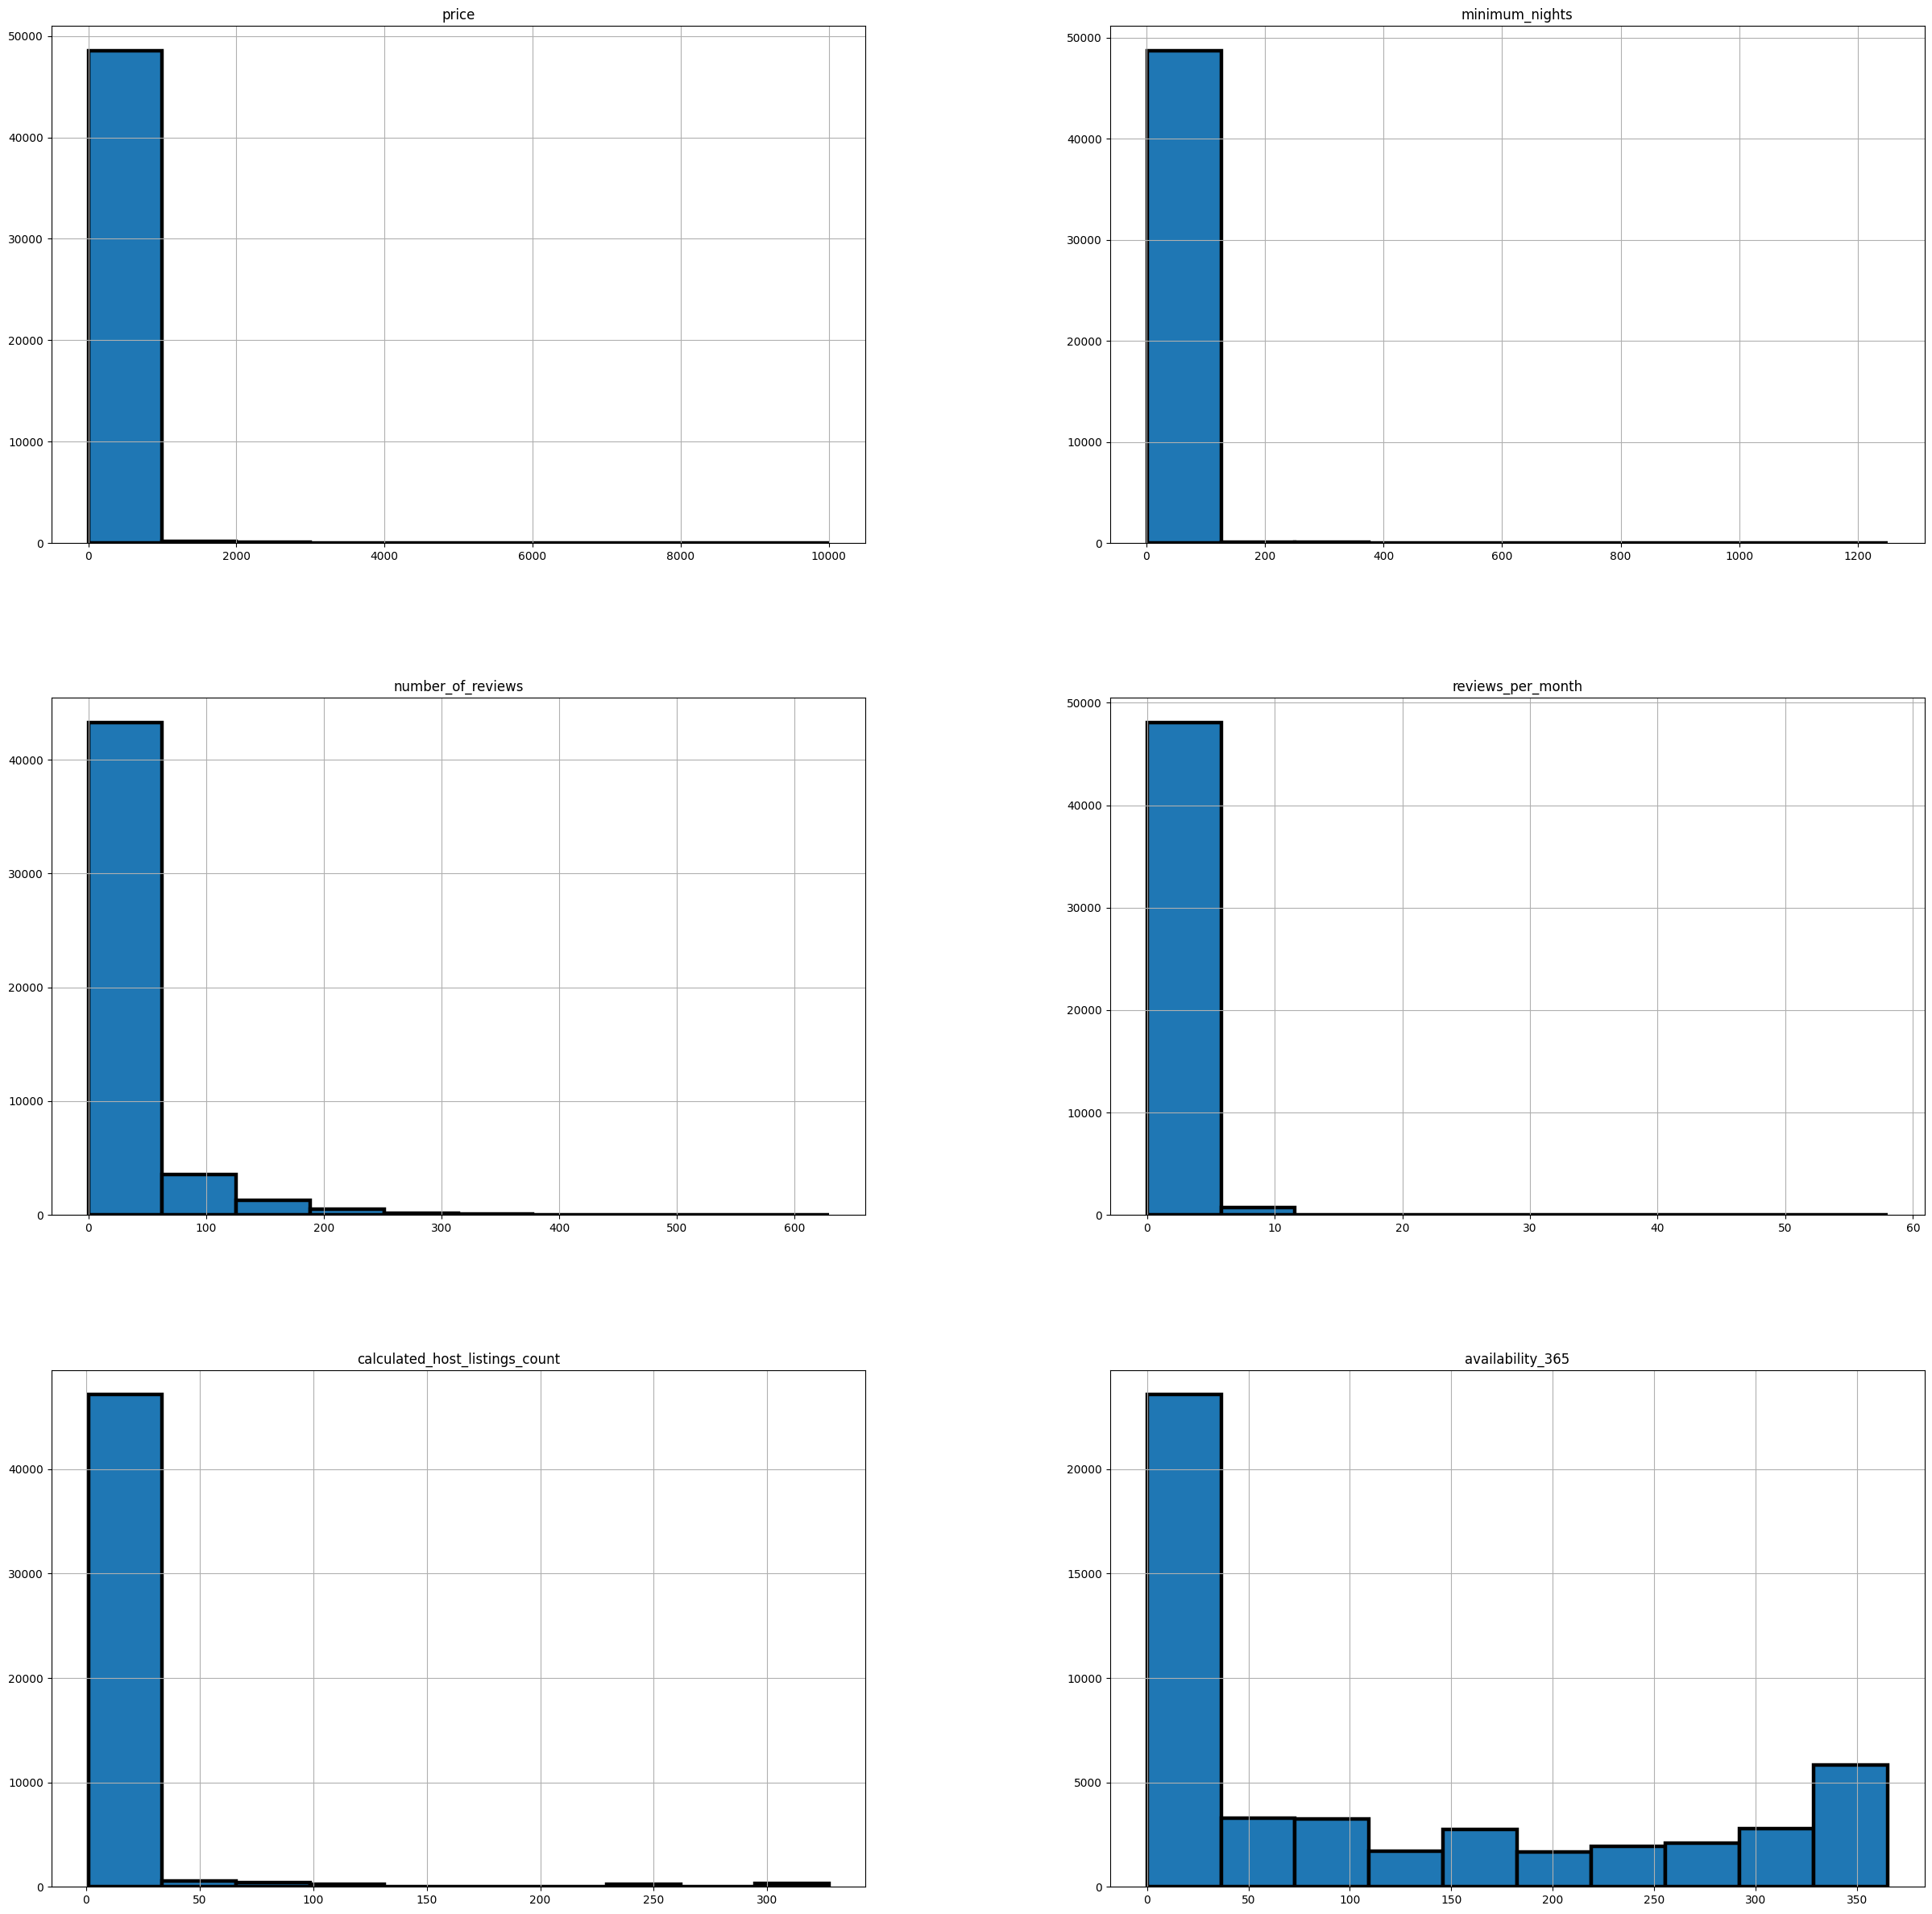

In [39]:
numerical_col.iloc[:, 4:].hist(edgecolor="black", linewidth=3.2, figsize=(30, 30))

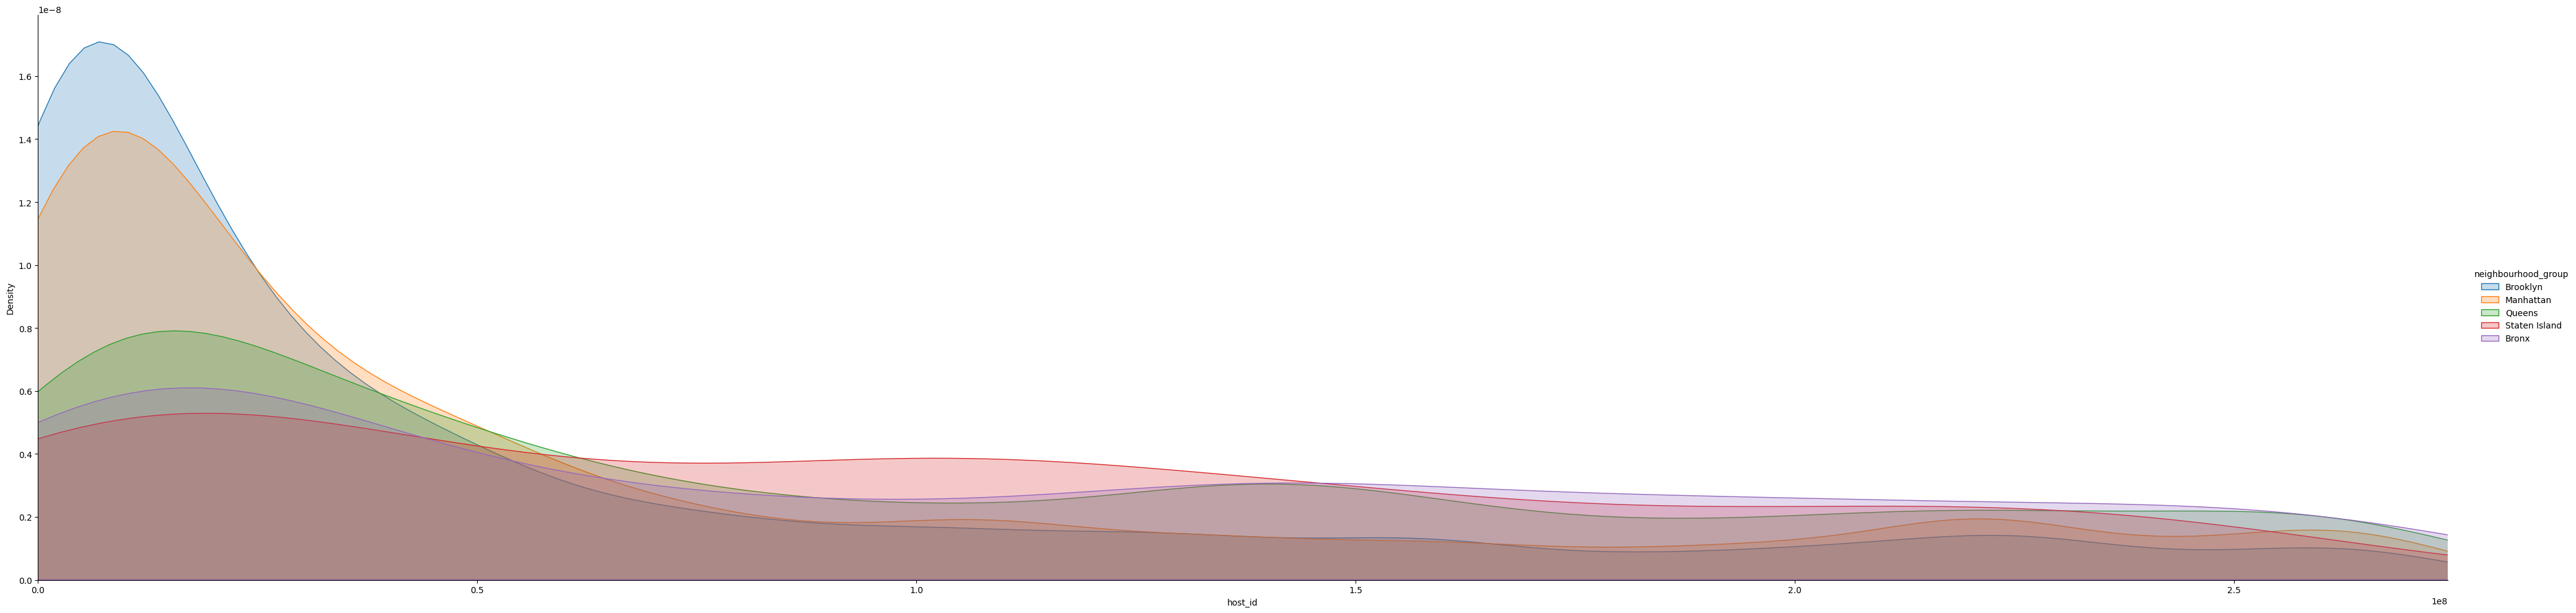

In [40]:
fig = sns.FacetGrid(df, hue="neighbourhood_group", aspect=4, height=10)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = df['host_id'].max()
fig.set(xlim=(0, oldest))
# sns.set(font_scale=5)
fig.add_legend()

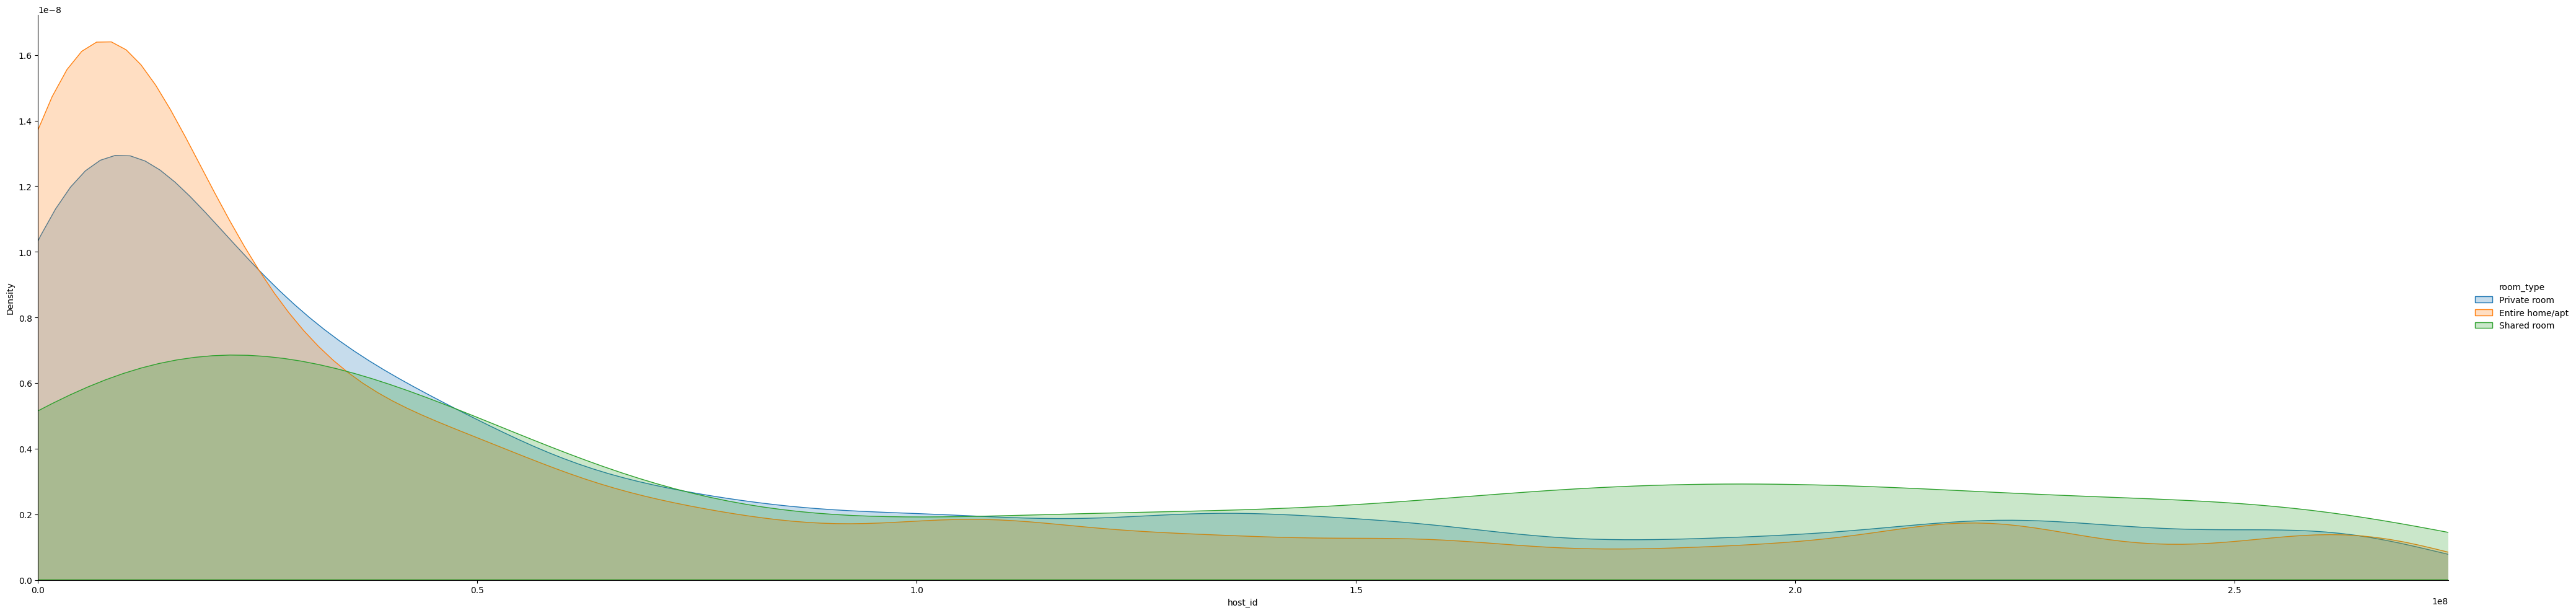

In [41]:
fig = sns.FacetGrid(df, hue="room_type", aspect=4, height=10)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = df['host_id'].max()
fig.set(xlim=(0, oldest))
# sns.set(font_scale=5)
fig.add_legend()

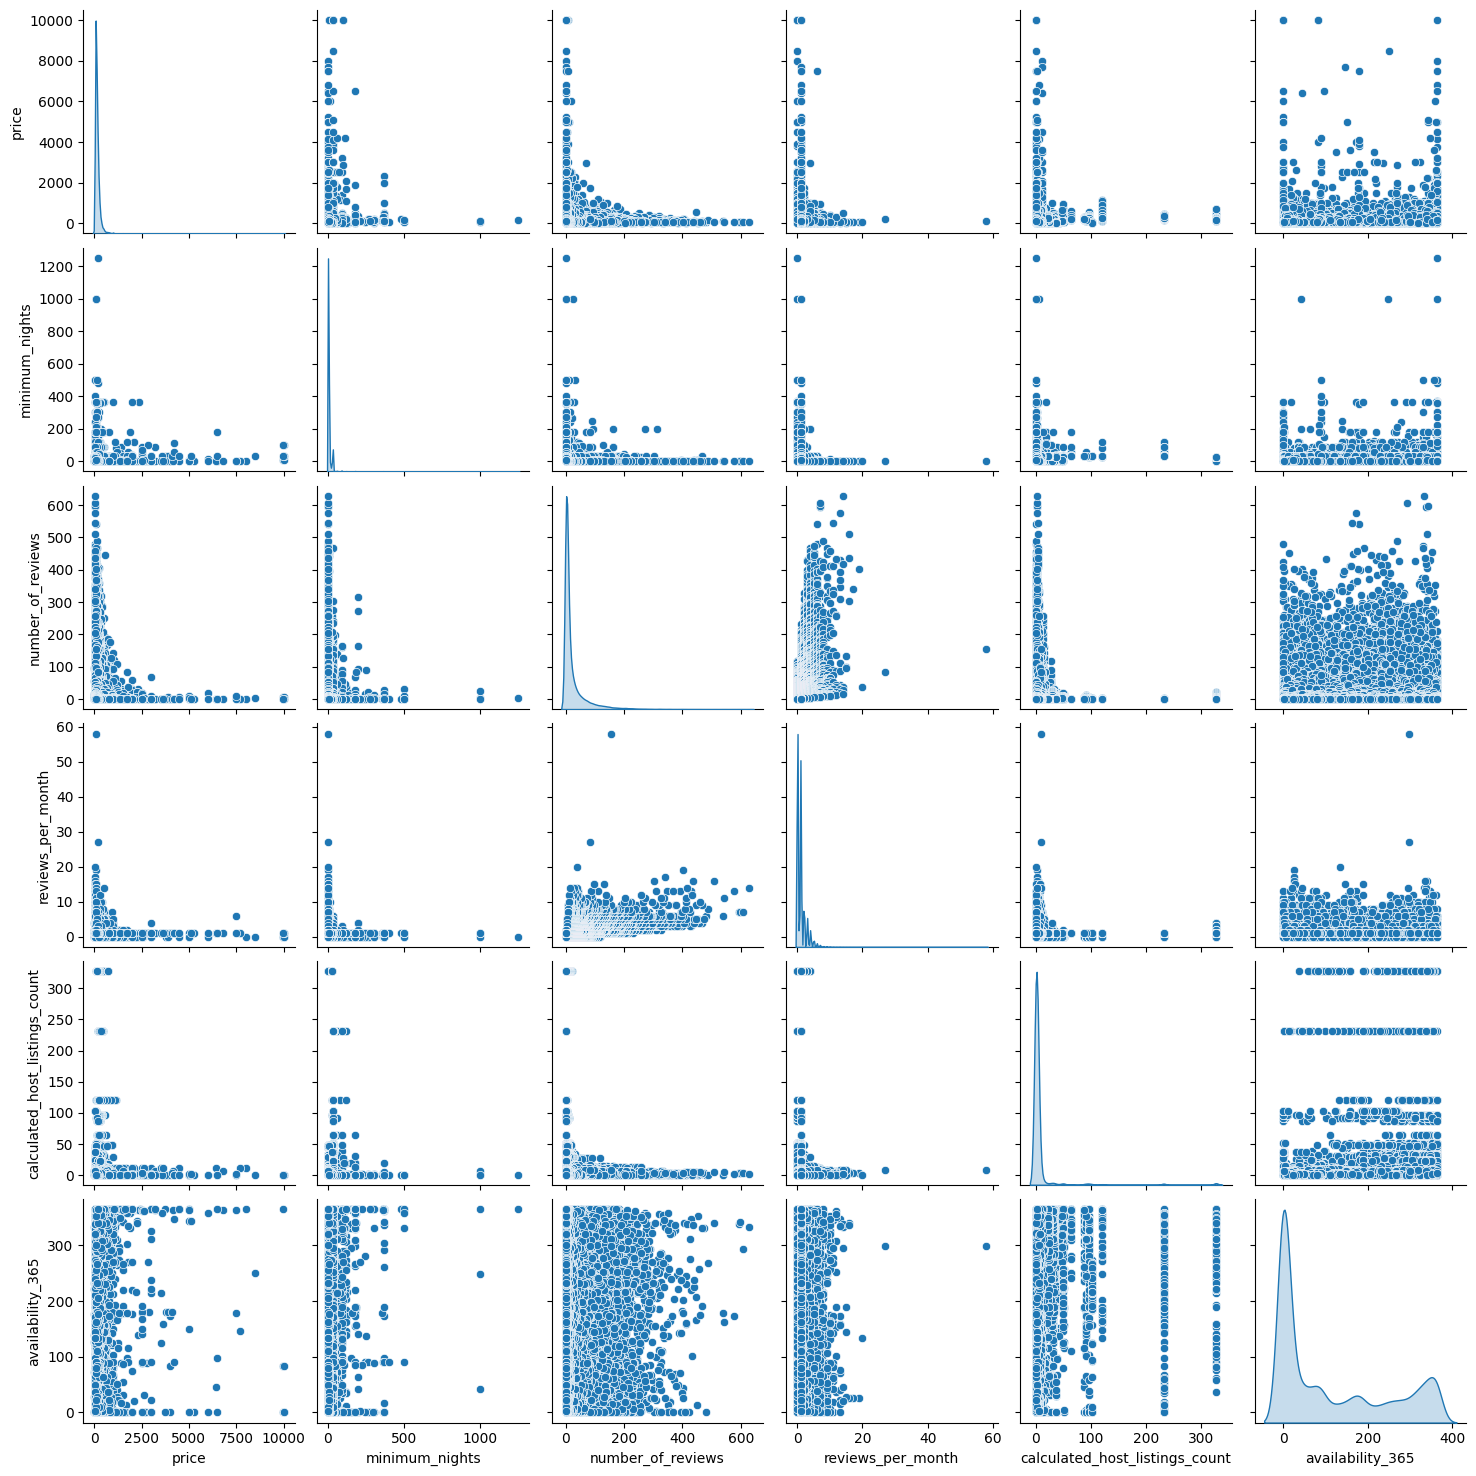

In [42]:
sns.pairplot(numerical_col.iloc[:, 4:], diag_kind='kde')

##### Created Temporary DataFrame for creating an pairplots

In [43]:
temp_df = pd.concat([numerical_col, categorical_col.iloc[:, [2, -1]]], axis=1)

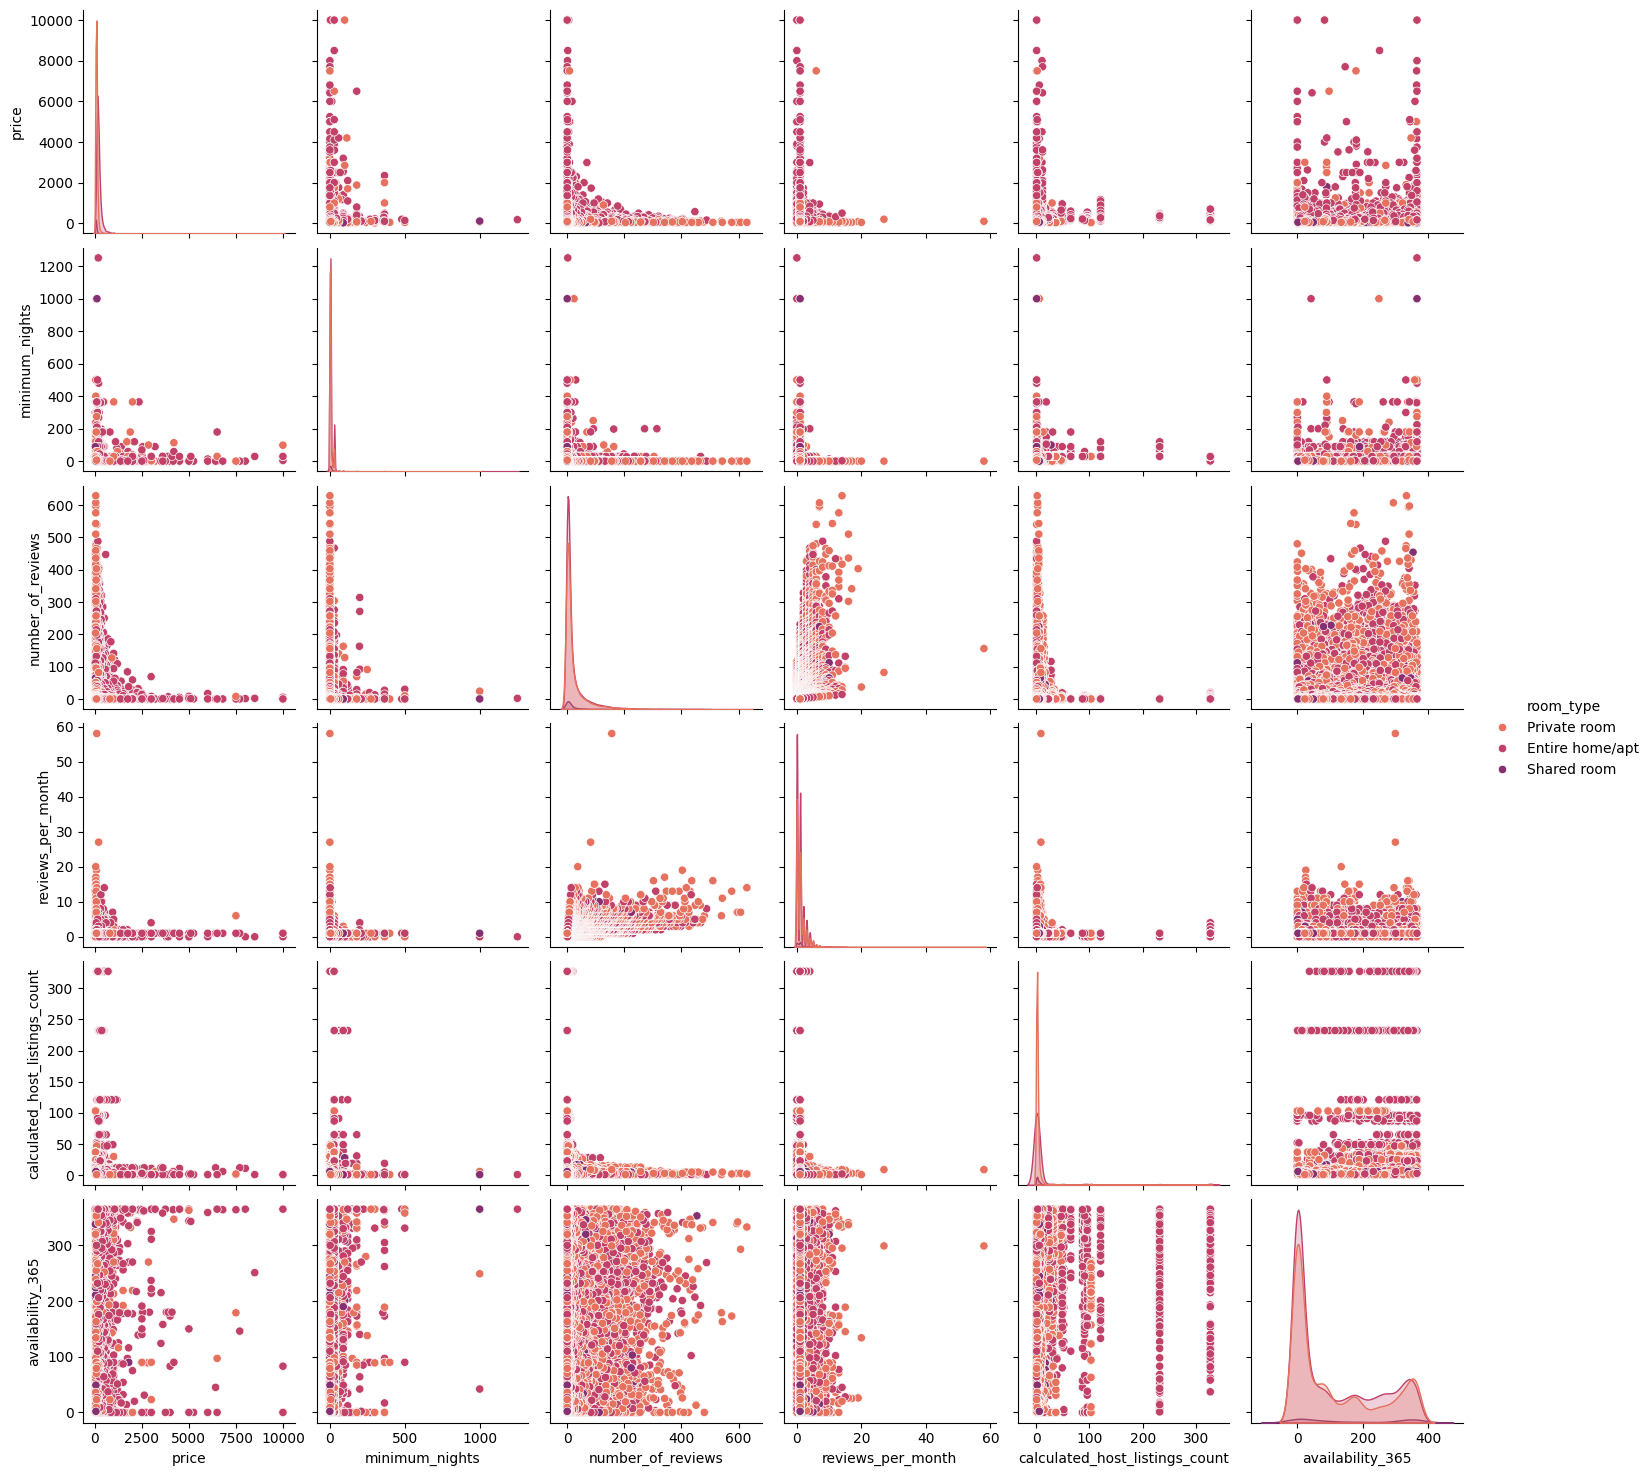

In [44]:
sns.pairplot(temp_df.iloc[:, 4:], diag_kind='kde', hue='room_type', palette='flare')

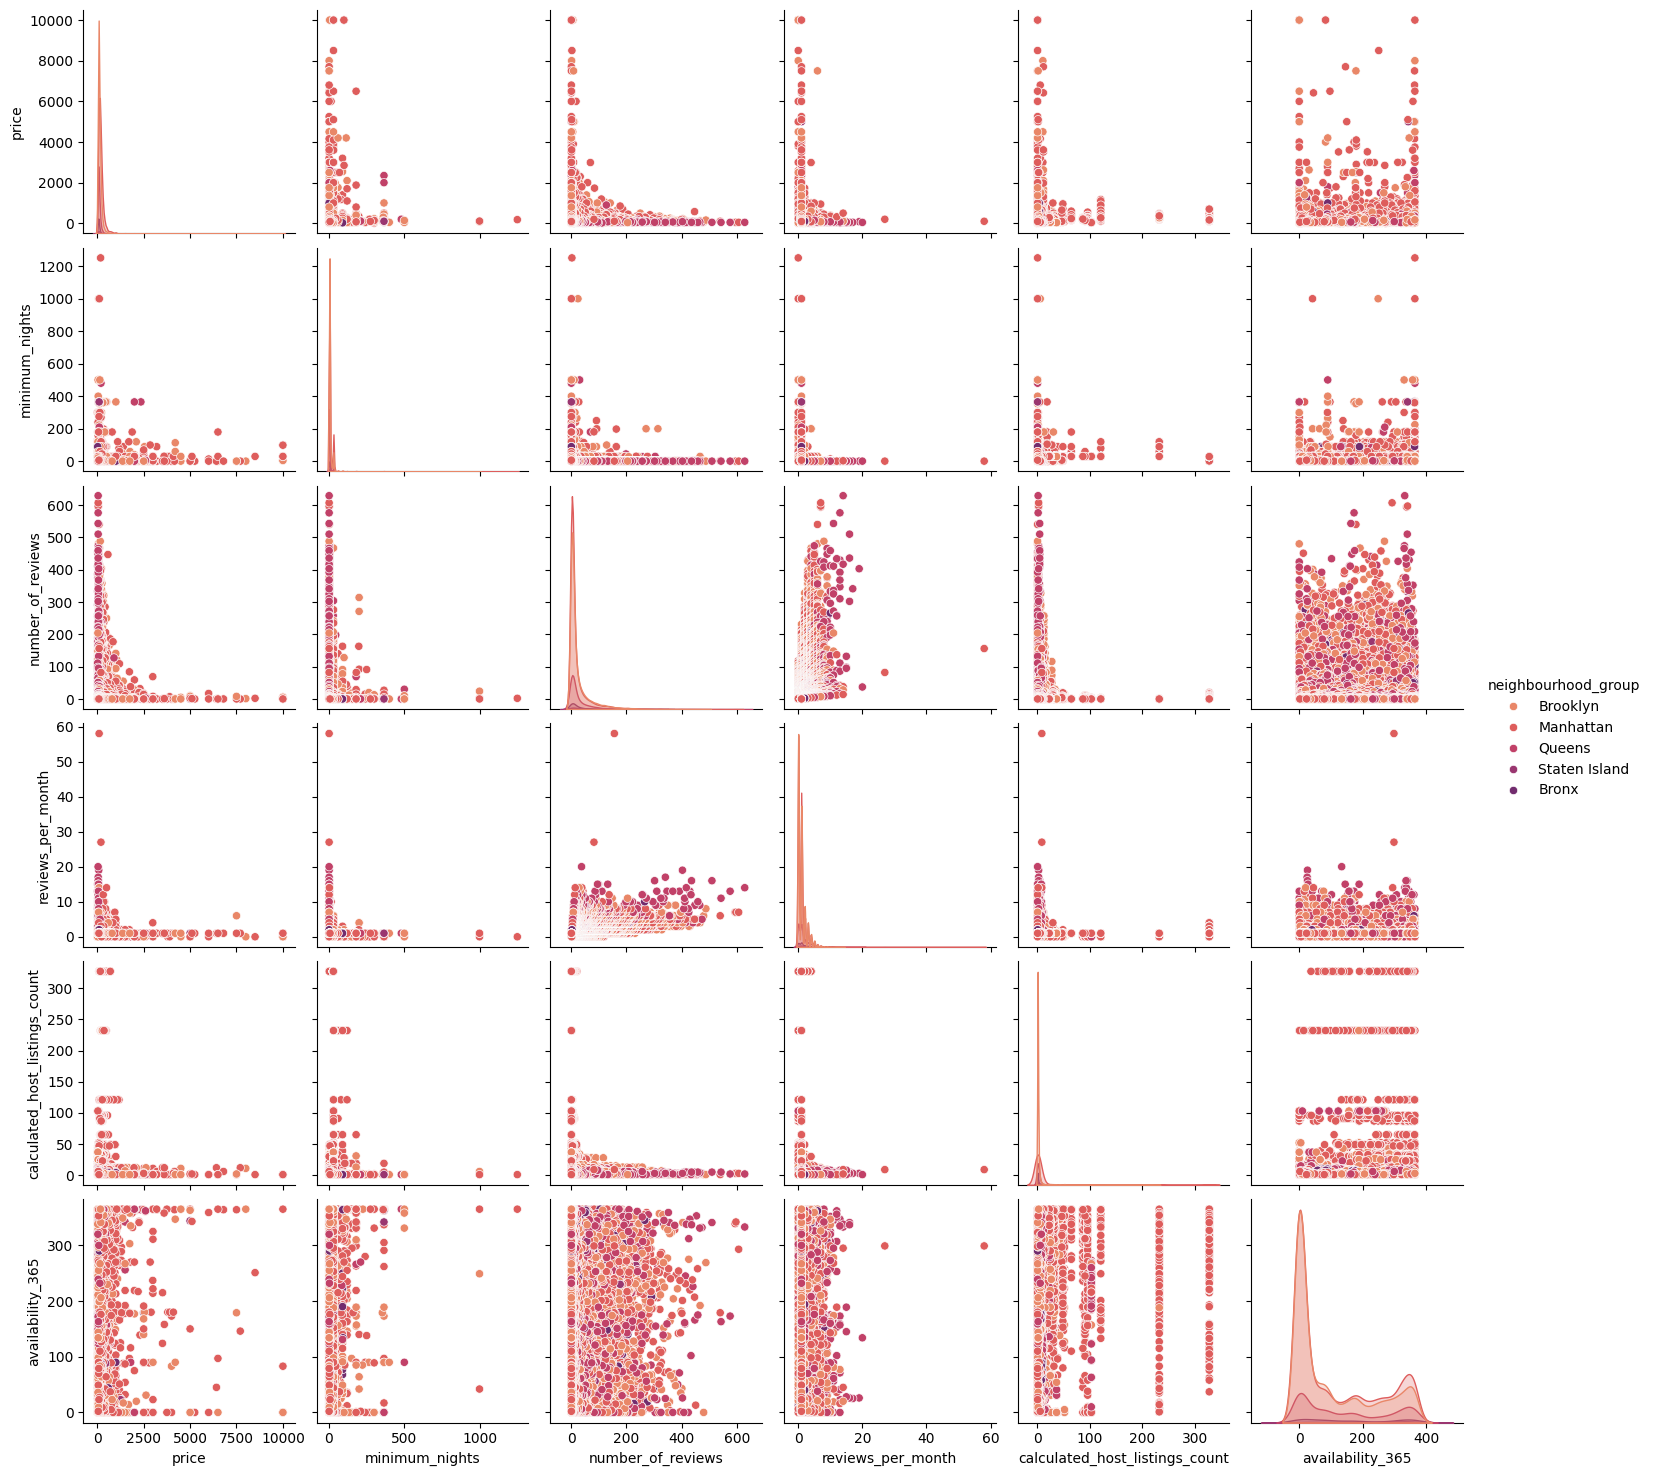

In [45]:
sns.pairplot(temp_df.iloc[:, 4:], diag_kind='kde', hue='neighbourhood_group', palette='flare')

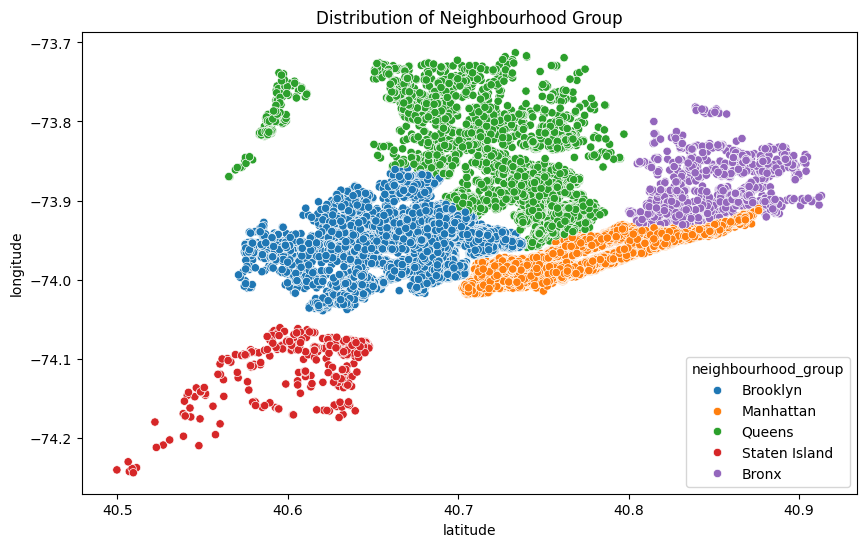

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= df, hue= 'neighbourhood_group')
plt.title('Distribution of Neighbourhood Group')
# sns.set(font_scale=1)
plt.show()

##### Heatmap

<Axes: >

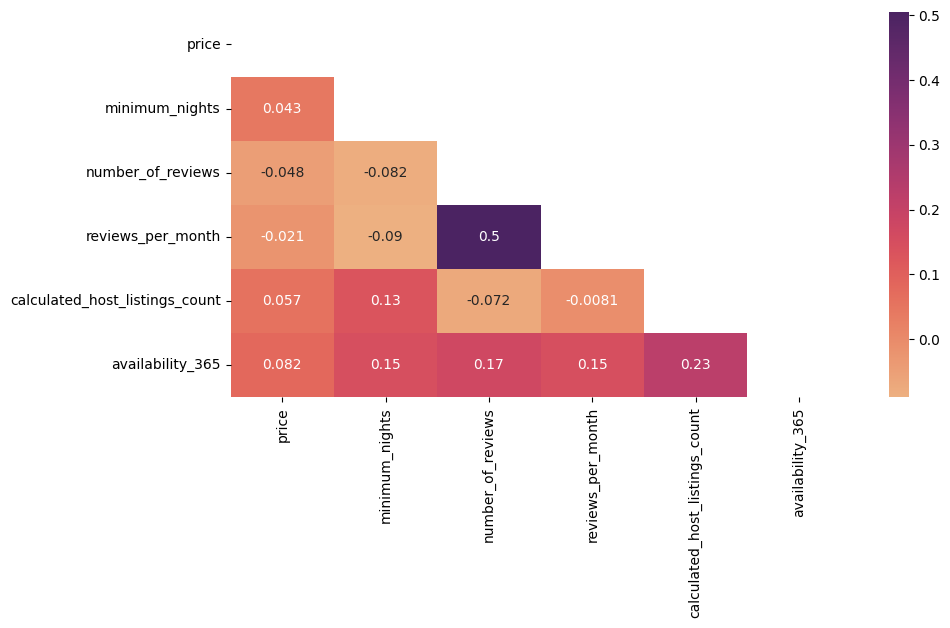

In [47]:
plt.figure(figsize=(10,5))
corr = numerical_col.iloc[:, 4:].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='flare')

#### Categorical Data Analysis

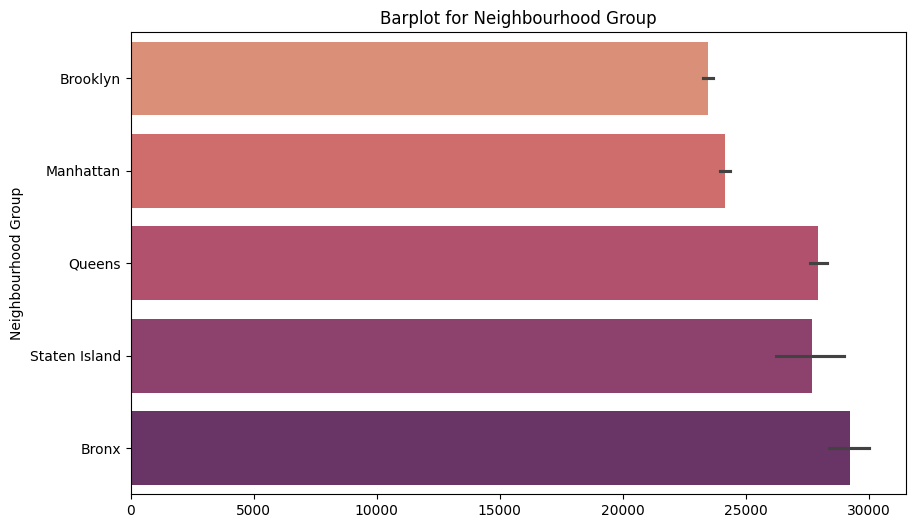

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(categorical_col['neighbourhood_group'], palette='flare')
plt.title('Barplot for Neighbourhood Group')
plt.ylabel('Neighbourhood Group')
plt.show()

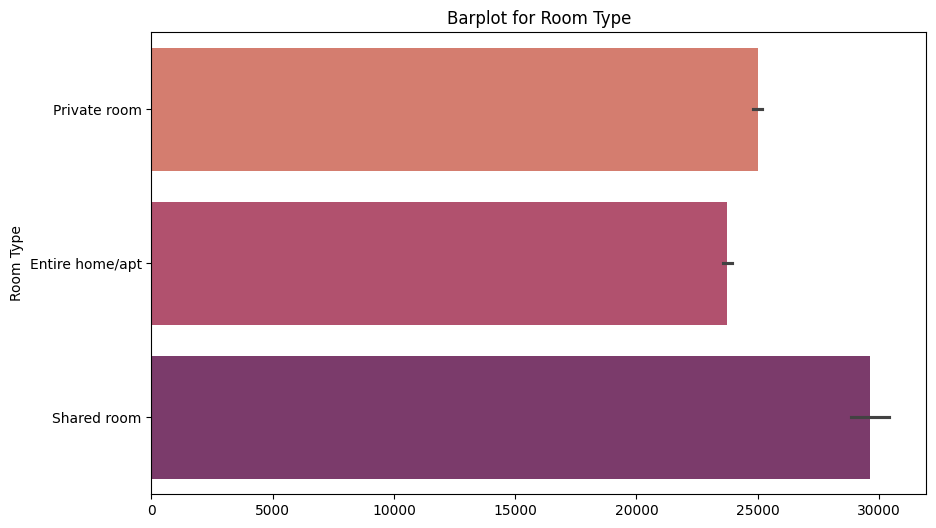

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(categorical_col['room_type'], palette='flare')
plt.title('Barplot for Room Type')
plt.ylabel('Room Type')
plt.show()

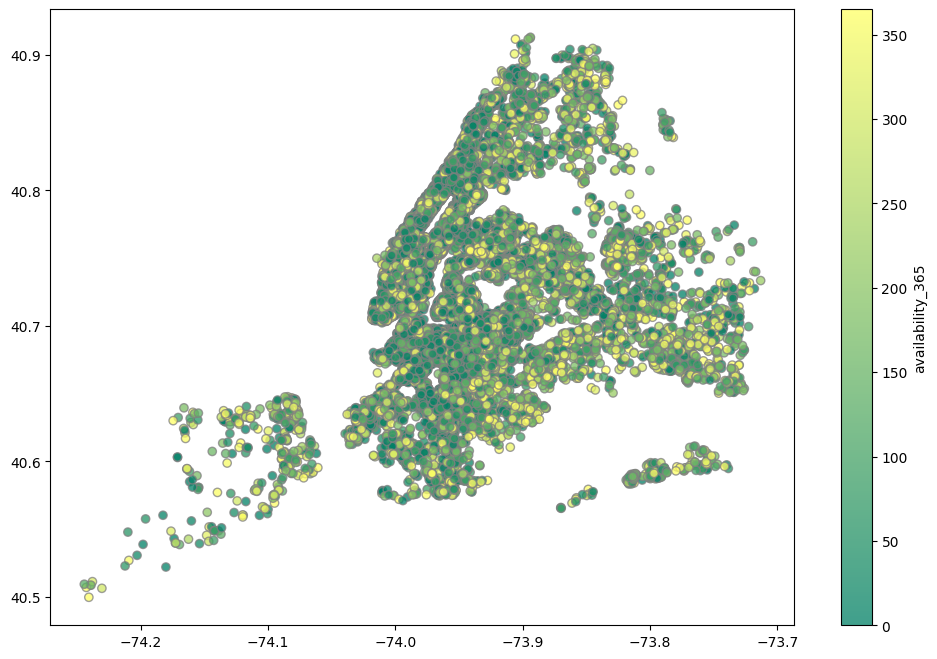

In [50]:
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='summer', edgecolor='grey', linewidth=1, alpha=0.75)
# sns.set(font_scale=1)
cbar = plt.colorbar()
cbar.set_label('availability_365')

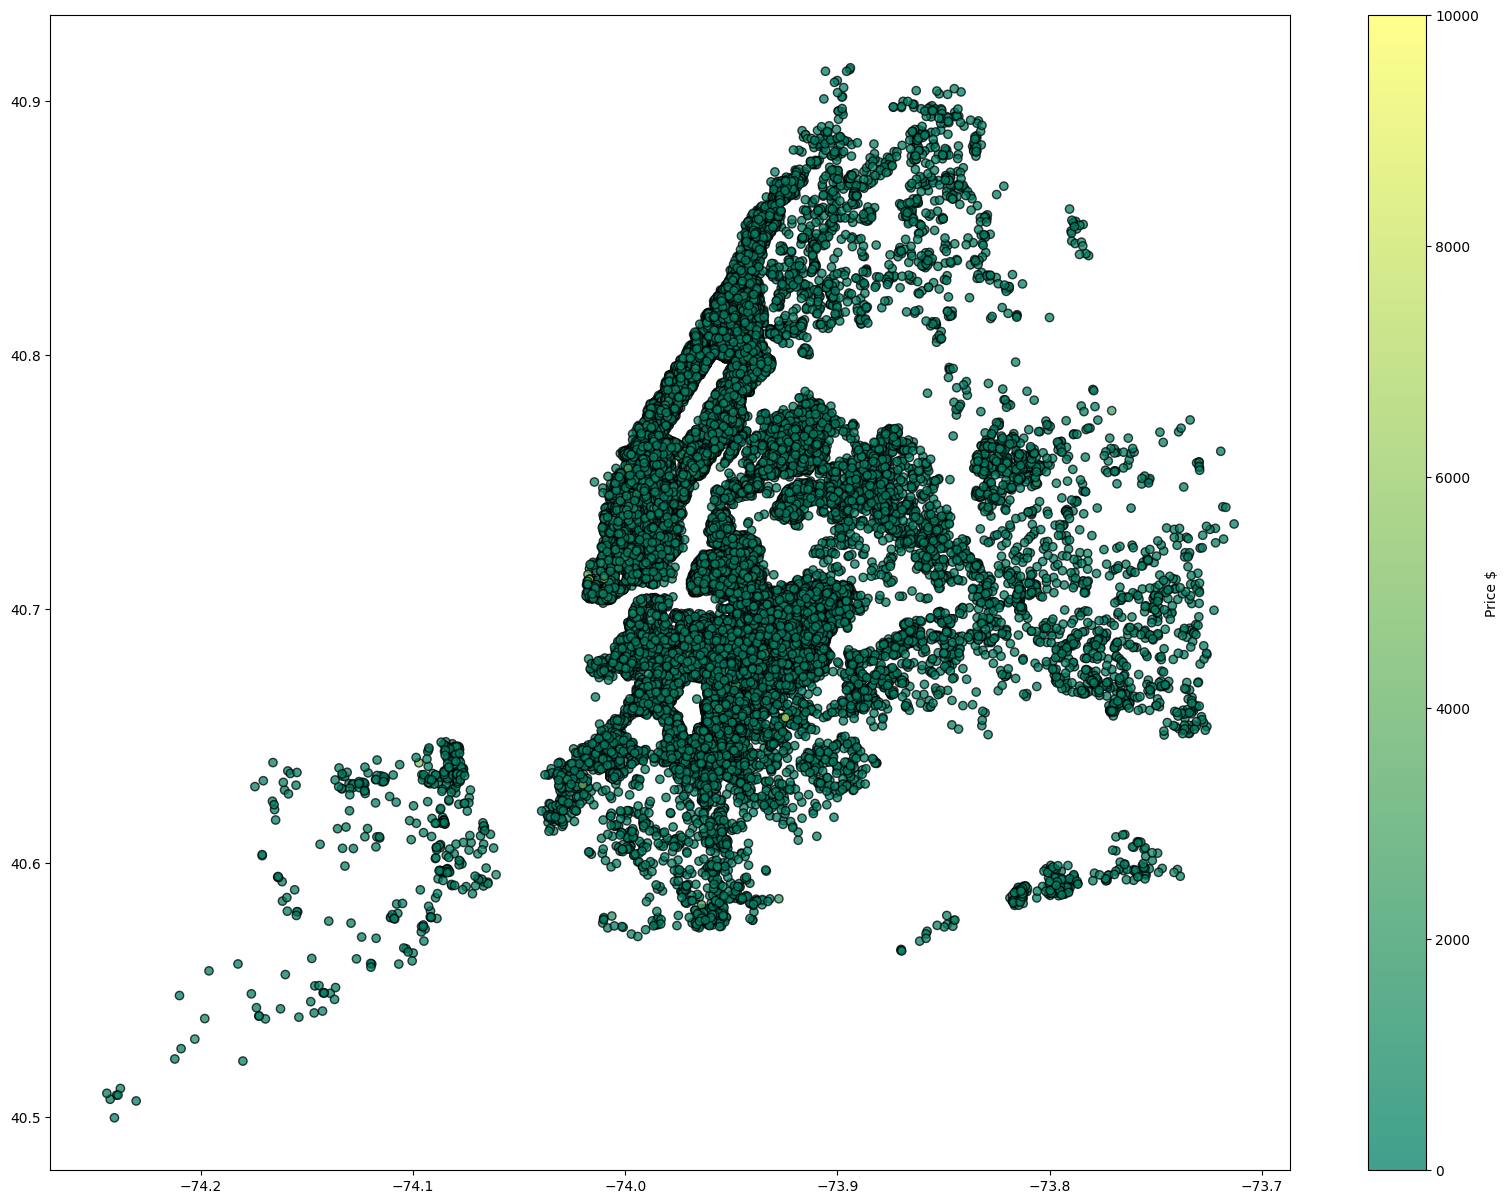

In [51]:
plt.figure(figsize=(20, 15))
plt.scatter(df.longitude, df.latitude, c=df.price, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Price $')

#### Outlier Detection

<Axes: ylabel='price'>

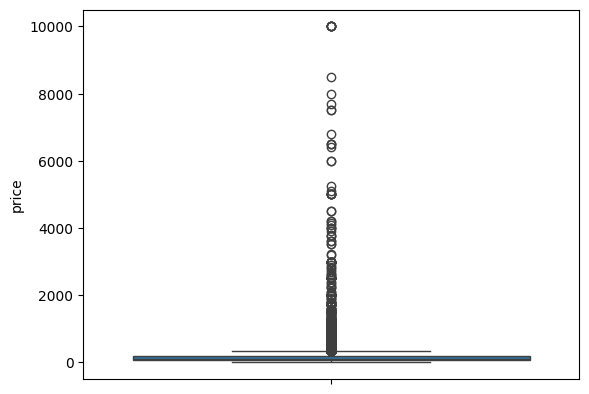

In [57]:
sns.boxplot(numerical_col['price'])

<Axes: xlabel='price', ylabel='Count'>

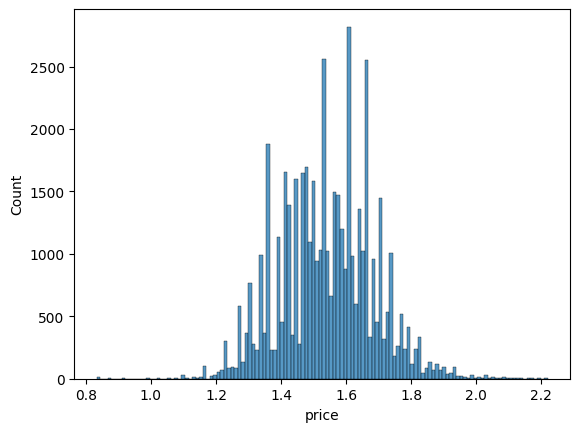

In [53]:
sns.histplot(np.log(np.log(numerical_col['price'])))

<Axes: xlabel='price', ylabel='Density'>

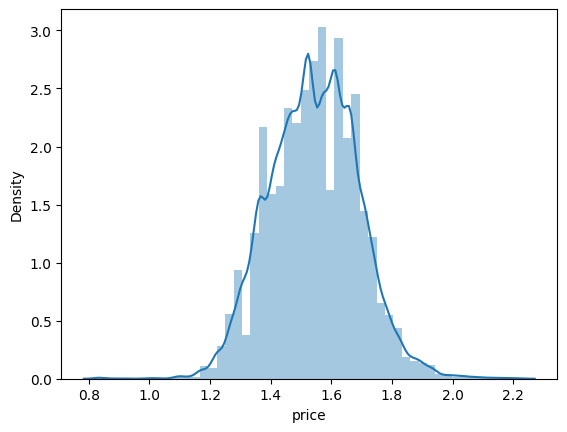

In [56]:
sns.distplot(np.log(np.log(numerical_col['price'])))

In [54]:
numerical_col['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64